In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import pylab
#import data
df = pd.read_csv('HY_Universe_corporatebond.csv')
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 2721 x 37
       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \

In [102]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
print(df.iloc[0].dtypes)
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

In [103]:
print(df.isnull().sum())
print("It can be seen that there are no missing values, Nan values that we have in the table are intended to be Nan")

CUSIP                         0
Ticker                        0
Issue Date                    0
Maturity                      0
1st Call Date                 0
Moodys                        0
S_and_P                       0
Fitch                         0
Bloomberg Composite Rating    0
Coupon                        0
Issued Amount                 0
Maturity Type                 0
Coupon Type                   0
Maturity At Issue months      0
Industry                      0
LiquidityScore                0
Months in JNK                 0
Months in HYG                 0
Months in Both                0
IN_ETF                        0
LIQ SCORE                     0
n_trades                      0
volume_trades                 0
total_median_size             0
total_mean_size               0
n_days_trade                  0
days_diff_max                 0
percent_intra_dealer          0
percent_uncapped              0
bond_type                     0
Client_Trade_Percentage       0
weekly_m

In [104]:
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,...,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,...,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,...,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,...,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,...,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,...,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


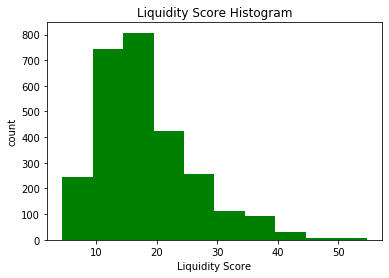

The histogram plot shows that majority of the liquidity scors are around 12-22


In [105]:
plt.hist(df['LiquidityScore'],color='green')
plt.title('Liquidity Score Histogram')
plt.xlabel('Liquidity Score')
plt.ylabel('count')
plt.show()
print("The histogram plot shows that majority of the liquidity scors are around 12-22")

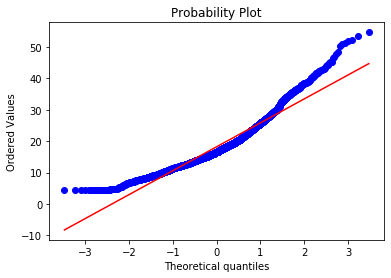

It can be seen from this QQ plot that there are some outliers as the points that are plotted do not lie in the straight line


In [106]:
stats.probplot(df['LiquidityScore'], dist="norm", plot=pylab)
pylab.show()
print("It can be seen from this QQ plot that there are some outliers as the points that are plotted do not lie in the straight line")

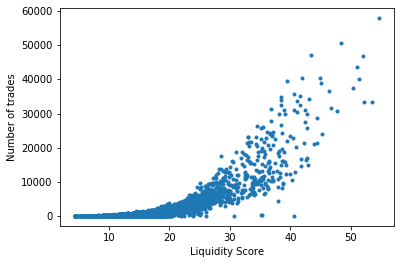

The scatter plot shows that a person's liquidity score is higher as the number of trade gets higher


In [107]:
_ = plt.plot(df['LiquidityScore'],df['n_trades'],marker='.', linestyle='none')
plt.xlabel('Liquidity Score')
plt.ylabel('Number of trades')
plt.show()
print("The scatter plot shows that a person's liquidity score is higher as the number of trade gets higher")

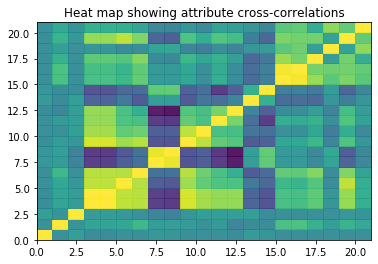

In [108]:
#visualize correlations using heatmap
_ = df.corr()
plt.pcolor(_, alpha=.9)
plt.title("Heat map showing attribute cross‐correlations")
plt.show()
print()

In [138]:
normed_df = (df[['n_trades','Maturity At Issue months','volume_trades']] - df[['n_trades','Maturity At Issue months','volume_trades']].min()) / (df[['n_trades','Maturity At Issue months','volume_trades']].max() - df[['n_trades','Maturity At Issue months','volume_trades']].min())

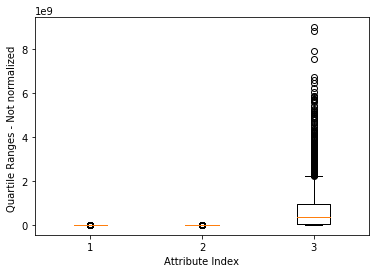

1 = n_trades
2 = Maturity at Issue Months
3 = Volume Trades
Hardly any information can be obtained through the unnormalized dataset


In [146]:
plt.boxplot(df[['n_trades','Maturity At Issue months','volume_trades']].values)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges - Not normalized "))
plt.show()
print("1 = n_trades")
print("2 = Maturity at Issue Months")
print("3 = Volume Trades")
print("Hardly any information can be obtained through the unnormalized dataset")

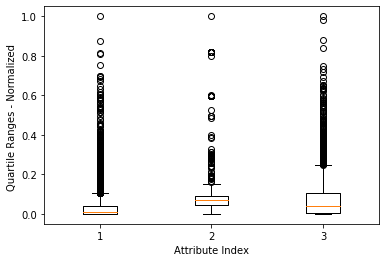

1 = n_trades
2 = Maturity at Issue Months
3 = Volume Trades
outliers are easier to be spotted with the normalized dataset


In [147]:
plt.boxplot(normed_df.values)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges - Normalized "))
plt.show()
print("1 = n_trades")
print("2 = Maturity at Issue Months")
print("3 = Volume Trades")
print("outliers are easier to be spotted with the normalized dataset")

In [148]:
print("My name is Yohanes Susanto")
print("My NetID is: yohanes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yohanes Susanto
My NetID is: yohanes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
